In [2]:
from mvpa.loading import load_betas
from utils import Options
import numpy as np
import pandas as pd
import nibabel as nb
from nilearn.image import new_img_like
from nilearn.plotting import plot_stat_map, plot_glass_brain
from glob import glob

In [4]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:         257862       52220       72062         240      133579      202900
Swap:         20479         885       19594


In [27]:
all_maps = sorted(glob('../../../FIR_correlations/ba-19-37_L_contr-objscrvsbas_top-3000_nothresh/*.nii'))

In [33]:
avgmap = []
for m in all_maps:
    avgmap.append(nb.load(m).get_fdata()[:,:,:,np.newaxis])
avgmap = np.concatenate(avgmap, axis=3)
avgmap = np.mean(avgmap, axis=3)
avgmap = new_img_like(all_maps[0], avgmap)

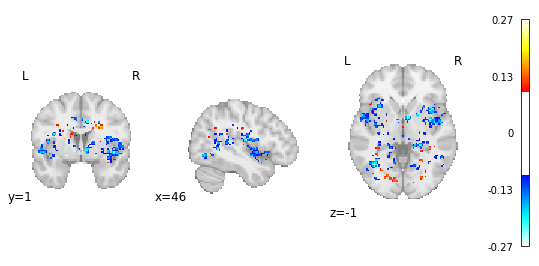

In [37]:
_ = plot_stat_map(avgmap, draw_cross=False, threshold=0.1)